# Visualize models

In [1]:
import numpy as np
import openpyxl
import pandas as pd
import pickle

def read_pickle(handle):
    return pickle.load(open(handle, "rb"))

models = read_pickle('tables/models.evaluated.pkl')
models_random = read_pickle('tables/models.random.evaluated.pkl')
models['random'] = models_random['random_mean']

from plots import AveragePrecision, AveragePrecisionK

## Plot select models

In [2]:
models.keys()

dict_keys(['jaccard-almanac-genes', 'jaccard-almanac-feature-types', 'jaccard-almanac-features', 'jaccard-cgc-genes', 'jaccard-cgc-feature-types', 'compatibility', 'nonsynonymous-variant-count', 'pca-almanac-genes', 'pca-cgc-genes', 'multi-pass-sort_fda-cgc', 'snf_fda-cgc-genes', 'snf_cgc', 'snf_fda-cgc', 'snf_almanac', 'somatic-tree', 'random'])

In [3]:
models_random.keys()

dict_keys(['random_mean', 'random_plus_one_std', 'random_minus_one_std'])

In [4]:
models['SNF: FDA & CGC'] = models['snf_fda-cgc']
models['SNF: FDA & CGC genes'] = models['snf_fda-cgc-genes']
models['Multi-pass sort: FDA & CGC'] = models['multi-pass-sort_fda-cgc']
models['CGC genes (Jaccard)'] = models['jaccard-cgc-genes']
models['SNF: CGC'] = models['snf_cgc']
models['Random mAP'] = models['random']

models['MOAlmanac genes (Jaccard)'] = models['jaccard-almanac-genes']
models['MOAlmanac feature types (Jaccard)'] = models['jaccard-almanac-feature-types']
models['MOAlmanac features (Jaccard)'] = models['jaccard-almanac-features']
models['CGC feature types (Jaccard)'] = models['jaccard-cgc-feature-types']
models['Compatibility'] = models['compatibility']
models['Nonsyn. variant count'] = models['nonsynonymous-variant-count']
models['MOAlmanac genes (PCA)'] = models['pca-almanac-genes']
models['CGC genes (PCA)'] = models['pca-cgc-genes']
models['SNF: MOAlmanac'] = models['snf_almanac']
models['Somatic tree'] = models['somatic-tree']

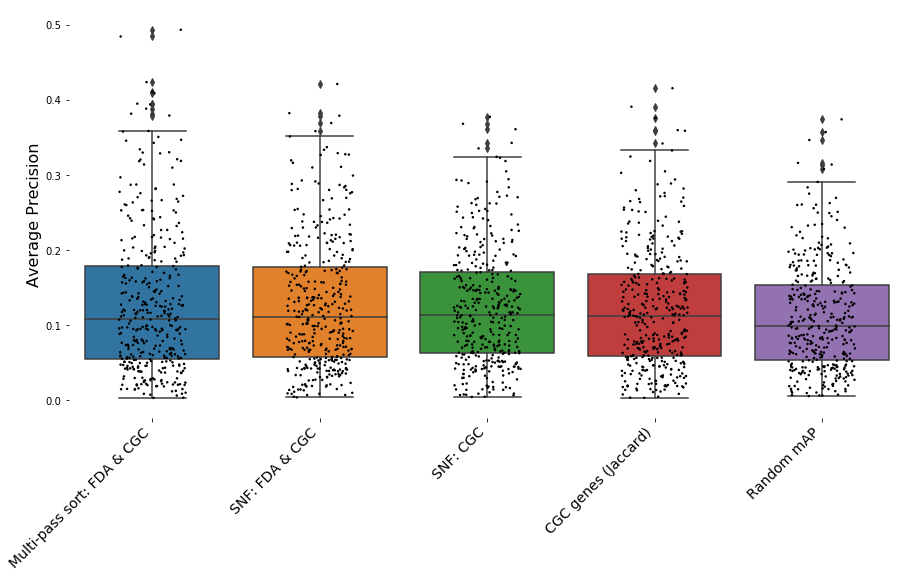

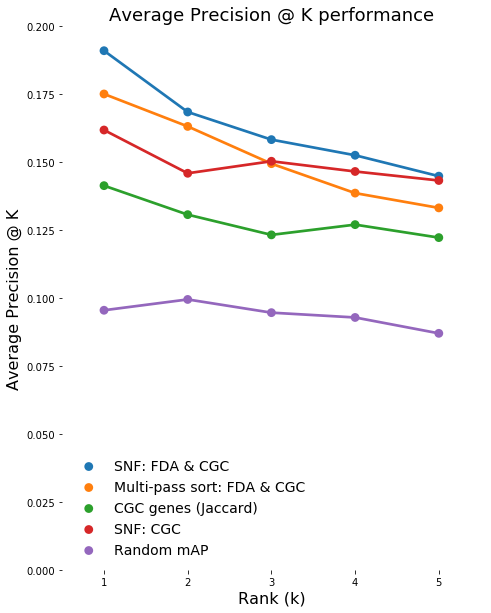

In [5]:
model_names = ['SNF: FDA & CGC', 'Multi-pass sort: FDA & CGC', 'CGC genes (Jaccard)', 
               'SNF: CGC', 'Random mAP']
AveragePrecision.plot(models, model_names, outname='select_models')
AveragePrecisionK.plot(models, model_names, outname='select_models')

## Plot mAP vs AP@1
We aimed to balance general (non-specific) genetic similarity with specific genetic similarity too. For example, cell lines that share specific, well-characterized variants should be close together and we should also consider similarity of the smattering of all observed genomic alterations. General genetic similarity is more directly captured by the mean average precision (mAP); it asks, "how well do we do _in general_ at sorting relevant cell lines closer to the case profile?". Specific similarity is a bit more captured by the average precision of the nearest neighbor (ap@1); it asks, "how often does the first neighbor share therapeutic sensitivity with the case profile?". To visualize this trade off, we plot the two evaluation metrics. I am choosing to put AP@1 on the x-axis, but neither metric is really a dependent variable.

In [6]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import pandas as pd

import sys
sys.path.append('../../common/')
import settings
settings.set_arial_as_font()

from settings import Colors
tableau10 = Colors.tableau10
moalmanac_red = Colors.almanac['red']

%matplotlib inline

In [7]:
models['SNF: FDA & CGC']['ap@k']

{1: 0.1909814323607427,
 2: 0.16843501326259946,
 3: 0.15826702033598583,
 4: 0.15251989389920426,
 5: 0.14482758620689656,
 6: 0.13925729442970822,
 7: 0.13717317165593026,
 8: 0.13527851458885942,
 9: 0.13409961685823754,
 10: 0.13527851458885942,
 20: 0.1319628647214854,
 25: 0.12657824933687004,
 50: 0.11803713527851459,
 100: 0.11315649867374004}

In [8]:
scatter_models = [
    'CGC feature types (Jaccard)',
    'CGC genes (Jaccard)',
    'CGC genes (PCA)',
    'Compatibility',
    'MOAlmanac feature types (Jaccard)',
    'MOAlmanac features (Jaccard)',
    'MOAlmanac genes (Jaccard)',
    'MOAlmanac genes (PCA)',
    'Multi-pass sort: FDA & CGC',
    'Nonsyn. variant count',
    'SNF: CGC',
    'SNF: FDA & CGC genes',
    'SNF: FDA & CGC',
    'SNF: MOAlmanac',
    'Somatic tree',
    'Random mAP']

list_ = []
for model in scatter_models:
    series = pd.Series({'model_name': model, 
                        'mAP': models[model]['mean_average_precision'], 
                        'AP@1': models[model]['ap@k'][1]})
    list_.append(series.to_frame().T)
df = pd.concat(list_)
df.set_index('model_name', inplace=True)
df.head()

df['label_x'] = df['AP@1']
df['label_y'] = df['mAP']

df.loc['CGC feature types (Jaccard)', 'label_x'] -= 0.04
df.loc['CGC feature types (Jaccard)', 'label_y'] -= 0.0005
df.loc['CGC genes (Jaccard)', 'label_x'] -= 0.02
df.loc['CGC genes (PCA)', 'label_x'] -= 0.02
df.loc['CGC genes (PCA)', 'label_y'] -= 0.0002
df.loc['Compatibility', 'label_x'] += 0.0275
df.loc['Compatibility', 'label_y'] -= 0.001
df.loc['MOAlmanac feature types (Jaccard)', 'label_x'] += 0.03
df.loc['MOAlmanac feature types (Jaccard)', 'label_y'] -= 0.001
df.loc['MOAlmanac features (Jaccard)', 'label_x'] -= 0.055
df.loc['MOAlmanac features (Jaccard)', 'label_y'] += 0.0003
df.loc['MOAlmanac genes (Jaccard)', 'label_x'] -= 0.055
df.loc['MOAlmanac genes (PCA)', 'label_x'] += 0.05
df.loc['MOAlmanac genes (PCA)', 'label_y'] -= 0.0005
df.loc['Multi-pass sort: FDA & CGC', 'label_x'] -= 0.03
df.loc['Multi-pass sort: FDA & CGC', 'label_y'] -= 0.001
df.loc['Nonsyn. variant count', 'label_y'] += 0.0005
df.loc['Nonsyn. variant count', 'label_x'] += 0.02
df.loc['SNF: CGC', 'label_y'] -= 0.001
df.loc['SNF: CGC', 'label_x'] += 0.02
df.loc['SNF: FDA & CGC genes', 'label_y'] -= 0.001
df.loc['SNF: FDA & CGC', 'label_y'] -= 0.001
df.loc['SNF: MOAlmanac', 'label_x'] += 0.035
df.loc['SNF: MOAlmanac', 'label_y'] -= 0.001
df.loc['Somatic tree', 'label_y'] -= 0.001
df.loc['Random mAP', 'label_y'] += 0.0005

#df.loc['Compatibility', 'label_y'] = df.loc['Compatibility', 'label_y'] - 0.02

In [9]:
df.rename(index={'CGC feature types (Jaccard)': 'CGC feature types\n(Jaccard)',
                 'CGC genes (Jaccard)': 'CGC genes\n(Jaccard)',
                 'CGC genes (PCA)': 'CGC genes\n(PCA)',
                 'Multi-pass sort: FDA & CGC': 'Multi-pass sort:\nFDA & CGC',
                 'Nonsyn. variant count': 'Nonsyn.\nvariant count',
                },
          inplace=True)

In [10]:
df.sort_values('mAP', ascending=False)

,mAP,AP@1,label_x,label_y
model_name,,,,
Multi-pass sort:\nFDA & CGC,0.12873,0.175066,0.145066,0.12773
SNF: FDA & CGC,0.127253,0.190981,0.190981,0.126253
Somatic tree,0.127237,0.119363,0.119363,0.126237
SNF: FDA & CGC genes,0.126124,0.153846,0.153846,0.125124
SNF: CGC,0.123493,0.161804,0.181804,0.122493
SNF: MOAlmanac,0.122526,0.153846,0.188846,0.121526
CGC genes\n(Jaccard),0.121369,0.141333,0.121333,0.121369
Compatibility,0.120124,0.107239,0.134739,0.119124
CGC feature types\n(Jaccard),0.119836,0.109626,0.0696257,0.119336


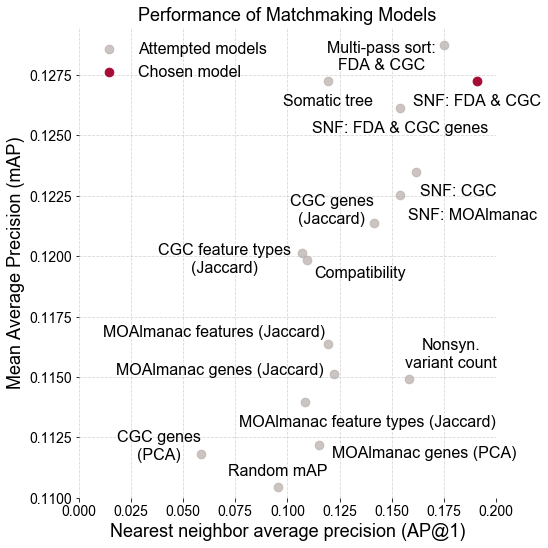

In [21]:
def display_label(data, ax, index_value, fontsize=16, add_x=0, add_y=0):
    x = data.loc[index_value, 'label_x']
    y = data.loc[index_value, 'label_y']
    
    ax.annotate(index_value, (x + add_x, y + add_y), fontsize=fontsize, ha='center')

def remove_spines(axis):
    axis.spines["top"].set_visible(False)    
    axis.spines["bottom"].set_visible(False)    
    axis.spines["right"].set_visible(False)    
    axis.spines["left"].set_visible(False)

fig = plt.figure(constrained_layout=True, figsize=(7.5, 7.5))
ax = plt.subplot()
remove_spines(ax)

p1 = (df
      .plot(kind='scatter', x='AP@1', y='mAP', ax=ax, 
            fontsize=14, s=75, alpha=0.75, color=tableau10['grey'], label='Attempted models'))
p2 = (df
      .loc['SNF: FDA & CGC', :].to_frame().T
      .plot(kind='scatter', x='AP@1', y='mAP', ax=ax, 
            fontsize=14, s=75, alpha=1.00, color=moalmanac_red, label='Chosen model'))
title = 'Performance of Matchmaking Models'
plt.title(title, fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlim([0, 0.20])
plt.ylim([0.11, 0.1295])

plt.legend(fontsize=16, frameon=False)

plt.grid(True, linestyle='--', alpha=0.5)

for index in df.index.tolist():
    display_label(df, ax, index)

plt.xlabel('Nearest neighbor average precision (AP@1)', fontsize=18)
plt.ylabel('Mean Average Precision (mAP)', fontsize=18)

folder = '../../figures/figure-03-b'
filename = 'figure-3-b'

!mkdir -p $folder
for suffix in ['svg', 'png', 'pdf']:
    outname = f'{folder}/{filename}.{suffix}'
    plt.savefig(outname, format=suffix)
(df
 .sort_values(['AP@1', 'mAP'], ascending=False)
 .to_excel(f'{folder}/figure-3-b.xlsx', index_label='model')
)
    
plt.show()

In [20]:
df.loc['SNF: FDA & CGC', :].to_frame().T

,mAP,AP@1,label_x,label_y
SNF: FDA & CGC,0.127253,0.190981,0.190981,0.126253
